In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, KFold 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
from sklearn import linear_model 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.feature_extraction import DictVectorizer

dataScr = pd.read_csv('salary_part.csv') # 1. Загрузка данных


categorical_columns = [c for c in dataScr.columns if dataScr[c].dtype.name == 'object'] # 2. Разделение признаков на числовые и категориальные
int_columns = [c for c in dataScr.columns if dataScr[c].dtype.name != 'object'][:-1]
y = dataScr.drop(int_columns + categorical_columns, axis = 1, inplace = False)
data_int = dataScr[int_columns] #Числовые
data_categorical = dataScr[categorical_columns] #Категориальные

In [ ]:
train_scaled = StandardScaler().fit_transform(data_int) # 3. Ортонормирование числовых признаков

In [ ]:
data_categorical = data_categorical.astype(str).T.to_dict().values() # 4. One-hot-кодирование категориальных признаков с помощью DictVectorizer
dict_scaled = DictVectorizer(sparse=False).fit_transform(data_categorical)

In [ ]:
X = np.hstack((train_scaled, dict_scaled)) # 5. Объединение числовых и категориальных признаков

X_train, X_test, y_train, y_test = train_test_split(X, y) # 6. Разделение данных на обучающую и тестовую выборки

clf = SVC(probability = True, C = 10).fit(X_train, y_train.values.ravel()) # 7. Обучение классификатора на этих данных методом опорных векторов

ROC-AUC:  0.8734859483001453
PR-AUC:  0.7026268332566769


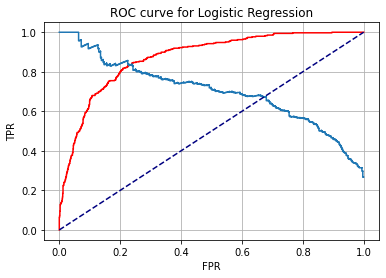

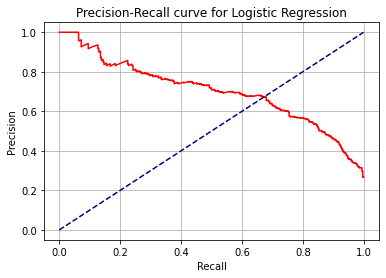

<Figure size 432x288 with 0 Axes>

In [ ]:
preds = clf.predict_proba(X_test)[:,1] # 8. Вычисление ROC-AUC и PR-AUC, построение ROC-кривой и Precision-Recall-кривой
roc = roc_auc_score(y_test, preds)
pr = average_precision_score(y_test, preds)
print("ROC-AUC: ", roc)
print("PR-AUC: ", pr)

fpr, tpr, threshold = roc_curve(y_test, preds)
plt.plot(fpr,tpr, color='r', label='Log Reg')
plt.title('ROC curve for Logistic Regression')
precision, recall, _=precision_recall_curve(y_test, preds)
plt.step(recall, precision)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()
plt.gcf().clear()

Precision, Recall, threshold = precision_recall_curve(y_test, preds)
plt.plot(Recall, Precision, color='r', label='Log Res')
plt.title('Precision-Recall curve for Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()
plt.gcf().clear()

In [ ]:
SVC1 = SVC() # 9. Подбор лучших параметров, обучение классификатора
params = {'C': [1, 5, 10, 15, 20], 'kernel': ['linear',  'rbf']}
cv = KFold(n_splits = 5)
CVC_grid = GridSearchCV(SVC1, params, cv = cv).fit(X_train, y_train.values.ravel())
print()
print('', CVC_grid.best_params_)

clf1 = SVC(C = CVC_grid.best_params_['C'], kernel = CVC_grid.best_params_['kernel'], probability = True).fit(X_train, y_train.values.ravel())
preds = clf1.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, preds)
pr = average_precision_score(y_test, preds)
print("ROC-AUC: ", roc) # Итог использования лучших параметров.
print("PR-AUC: ", pr)   # т.к. ROC-AUC и PR-AUC стали ближе к 1, то качество классификации улучшилось


 {'C': 10, 'kernel': 'linear'}
ROC-AUC:  0.9005465753721479
PR-AUC:  0.7442916707295713
